# Pokemon dataset 
# Name:Shreyas S Hegde
# Reg no: 240905118

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

In [3]:
df=pd.read_excel("pokemon_data.xlsx")
df.info

<bound method DataFrame.info of      national_number   gen english_name japanese_name primary_type  \
0                  1     I    Bulbasaur   Fushigidane        grass   
1                  2     I      Ivysaur    Fushigisou        grass   
2                  3     I     Venusaur   Fushigibana        grass   
3                  4     I   Charmander      Hitokage         fire   
4                  5     I   Charmeleon       Lizardo         fire   
..               ...   ...          ...           ...          ...   
893              894  VIII    Regieleki     Regieleki     electric   
894              895  VIII    Regidrago     Regidrago       dragon   
895              896  VIII    Glastrier      Blizapos          ice   
896              897  VIII    Spectrier       Rayspos        ghost   
897              898  VIII      Calyrex        Badrex      psychic   

    secondary_type       classification percent_male percent_female  height_m  \
0           poison         Seed Pokémon       

In [4]:
df.isnull().sum()

national_number         0
gen                     0
english_name            0
japanese_name           0
primary_type            0
secondary_type        429
classification          0
percent_male          122
percent_female        122
height_m                0
weight_kg               0
capture_rate            0
base_egg_steps          0
hp                      0
attack                  0
defense                 0
sp_attack               0
sp_defense              0
speed                   0
abilities_0             0
abilities_1           403
abilities_2           895
abilities_hidden      135
against_normal          0
against_fire            0
against_water           0
against_electric        0
against_grass           0
against_ice             0
against_fighting        0
against_poison          0
against_ground          0
against_flying          0
against_psychic         0
against_bug             0
against_rock            0
against_ghost           0
against_dragon          0
against_dark

In [5]:
# fill the missing /NaN values
df.fillna(0,inplace = True)
df.isnull().sum()

national_number       0
gen                   0
english_name          0
japanese_name         0
primary_type          0
secondary_type        0
classification        0
percent_male          0
percent_female        0
height_m              0
weight_kg             0
capture_rate          0
base_egg_steps        0
hp                    0
attack                0
defense               0
sp_attack             0
sp_defense            0
speed                 0
abilities_0           0
abilities_1           0
abilities_2           0
abilities_hidden      0
against_normal        0
against_fire          0
against_water         0
against_electric      0
against_grass         0
against_ice           0
against_fighting      0
against_poison        0
against_ground        0
against_flying        0
against_psychic       0
against_bug           0
against_rock          0
against_ghost         0
against_dragon        0
against_dark          0
against_steel         0
against_fairy         0
is_sublegendary 

# Q1. Detect outliers in weight_kg and height_m. Are there any abnormally large or small Pokémon?

Outliers based on weight:
      national_number   gen english_name japanese_name primary_type  \
58                59     I     Arcanine        Windie         fire   
75                76     I        Golem       Golonya         rock   
94                95     I         Onix         Iwark         rock   
129              130     I     Gyarados      Gyarados        water   
130              131     I       Lapras       Laplace        water   
..               ...   ...          ...           ...          ...   
882              883  VIII    Arctovish      Unorudon        water   
888              889  VIII    Zamazenta     Zamazenta     fighting   
889              890  VIII    Eternatus    Mugendaina       poison   
894              895  VIII    Regidrago     Regidrago       dragon   
895              896  VIII    Glastrier      Blizapos          ice   

    secondary_type      classification percent_male percent_female  height_m  \
58               0   Legendary Pokémon        75.49 

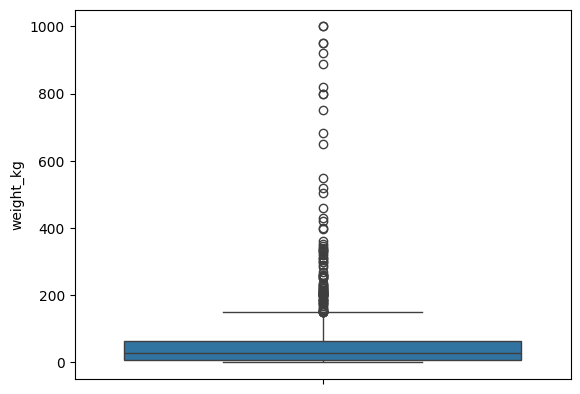

Outliers based on height 
      national_number   gen english_name japanese_name primary_type  \
23                24     I        Arbok         Arbok       poison   
94                95     I         Onix         Iwark         rock   
129              130     I     Gyarados      Gyarados        water   
147              148     I    Dragonair       Hakuryu       dragon   
207              208    II      Steelix      Haganeil        steel   
248              249    II        Lugia         Lugia      psychic   
249              250    II        Ho-Oh         Houou         fire   
320              321   III      Wailord        Whaloh        water   
349              350   III      Milotic    Milokaross        water   
381              382   III       Kyogre        Kyogre        water   
382              383   III      Groudon       Groudon       ground   
383              384   III     Rayquaza      Rayquaza       dragon   
482              483    IV       Dialga        Dialga        st

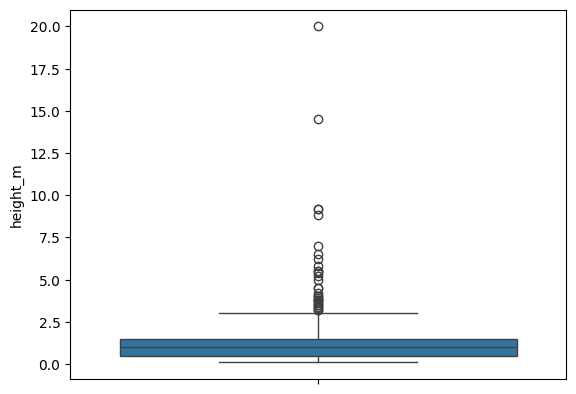

In [6]:
# Weight based outlier detection
Q1 = df['weight_kg'].quantile(0.25)
Q3 = df['weight_kg'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df[(df['weight_kg'] < lower) | (df['weight_kg'] > upper)]
print("Outliers based on weight:\n", outliers)

sns.boxplot(y = df["weight_kg"])
plt.show()

print("=================================================================================================")

#height based outlier detection
Q11=df['height_m'].quantile(0.25)
Q33=df['height_m'].quantile(0.75)
IQR2=Q33-Q11
l2=Q11-1.5*IQR2
u2=Q33+1.5*IQR2
outliers2=df[(df['height_m']<l2)| (df['height_m']>u2)]
print("Outliers based on height \n",outliers2)
sns.boxplot(y = df["height_m"])
plt.show()

Yes Multiple outliers exist based on weight and height

# Q2 Remove outliers from hp, then find the average hp by generation. Does the trend change after outlier removal?

In [7]:
df["hp"].describe()

count    898.000000
mean      69.031180
std       26.213707
min        1.000000
25%       50.000000
50%       65.000000
75%       80.000000
max      255.000000
Name: hp, dtype: float64

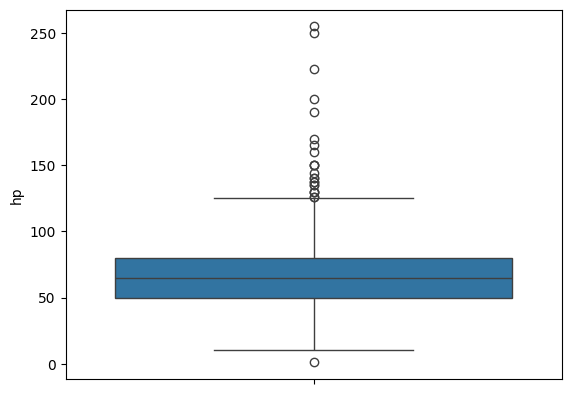

before removing outliers, mean health(hp) : 
 gen
I       64.211921
II      70.980000
III     65.666667
IV      73.102804
V       70.314103
VI      68.916667
VII     71.011364
VIII    71.112360
Name: hp, dtype: float64


In [8]:
sns.boxplot(y = df["hp"])
plt.show()

print("before removing outliers, mean health(hp) : \n" , df.groupby("gen")["hp"].mean())

In [9]:
Q1 = df['hp'].quantile(0.25)  
Q3 = df['hp'].quantile(0.75)  

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['hp'] >= lower) &(df['hp'] <= upper)]

print("after removing outliers, mean hp: \n" , df.groupby("gen")["hp"].mean())

after removing outliers, mean hp: 
 gen
I       60.863014
II      67.887755
III     63.615385
IV      71.028846
V       69.703226
VI      67.285714
VII     66.869048
VIII    68.839080
Name: hp, dtype: float64


## Question 3
### Use Z-score to find unusual values in attack. What are the top 5 outliers?

In [10]:
mean_attack = df['attack'].mean()
std_attack = df['attack'].std()

df['attack_zscore'] = (df['attack'] - mean_attack) / std_attack

x = df.loc[df['attack_zscore'].nlargest(5).index]
print(x[['english_name', 'attack', 'attack_zscore']])


    english_name  attack  attack_zscore
797      Kartana     181       3.577481
408    Rampardos     165       3.031603
485    Regigigas     160       2.861016
382      Groudon     150       2.519843
383     Rayquaza     150       2.519843


C:\Users\Shreyas S Hegde\AppData\Local\Temp\ipykernel_22688\3385331265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['attack_zscore'] = (df['attack'] - mean_attack) / std_attack


## Question 4
### How does the average attack vary across different primary_types?

In [11]:
df.groupby('primary_type')['attack'].mean()

primary_type
bug         65.932432
dark        82.500000
dragon      98.766667
electric    73.897959
fairy       59.850000
fighting    99.371429
fire        83.741379
flying      71.571429
ghost       68.068966
grass       72.767442
ground      92.657143
ice         73.071429
normal      73.893204
poison      72.676471
psychic     61.854545
rock        87.120000
steel       86.689655
water       70.949153
Name: attack, dtype: float64

 Lowest for fairy and highest for fighting

## Question 5
### Find the average HP of Pokémon from each generation.

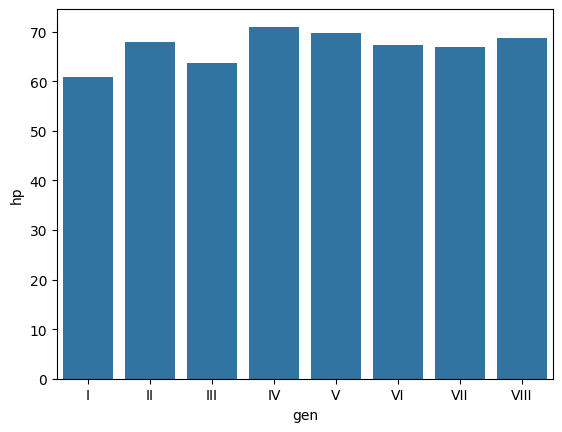

In [12]:
df.groupby("gen")["hp"].mean()

sns.barplot(df.groupby("gen")["hp"].mean())
plt.show()

## Question 6
### How many Pokémon have a secondary type?

In [13]:
(df['secondary_type'] != 0).sum()

np.int64(459)

## Question 7
### Which secondary types appear most frequently with Water as the primary type?

In [14]:
water = df[(df['primary_type'] == 'water')]

water.groupby("secondary_type").size()

secondary_type
0           63
bug          2
dark         4
dragon       3
electric     2
fairy        4
fighting     2
flying       7
ghost        2
grass        3
ground       9
ice          3
poison       3
psychic      5
rock         5
steel        1
dtype: int64

## Question 8
### Compare the average total stat of Pokémon who are Legendary, Sub-Legendary, and Mythical.What insights do you find?

In [15]:
status_list = []

for i in range(len(df)):
    if df.iloc[i]['is_mythical'] == 1:
        status_list.append("Mythical")
    elif df.iloc[i]['is_legendary'] == 1:
        status_list.append("Legendary")
    elif df.iloc[i]['is_sublegendary'] == 1:
        status_list.append("Sub-Legendary")
    else:
        status_list.append("Normal")

df['status'] = status_list

df.groupby('status')[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].mean()


C:\Users\Shreyas S Hegde\AppData\Local\Temp\ipykernel_22688\75742349.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'] = status_list


,hp,attack,defense,sp_attack,sp_defense,speed
status,,,,,,
Legendary,95.266667,109.000000,102.933333,114.666667,106.266667,87.866667
Mythical,84.800000,101.300000,93.350000,110.950000,97.150000,96.450000
Normal,64.767588,73.478643,69.522613,65.791457,66.945980,63.350503
Sub-Legendary,84.558140,102.279070,97.302326,98.790698,94.906977,92.604651


## Question 9
### Create a heatmap of correlations between all stat columns. What pairs are most correlated?

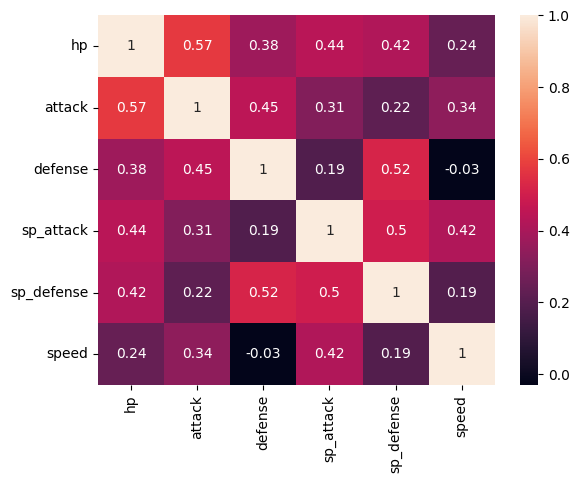

In [16]:
corr = df[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].corr()

sns.heatmap(corr, annot=True)
plt.show()

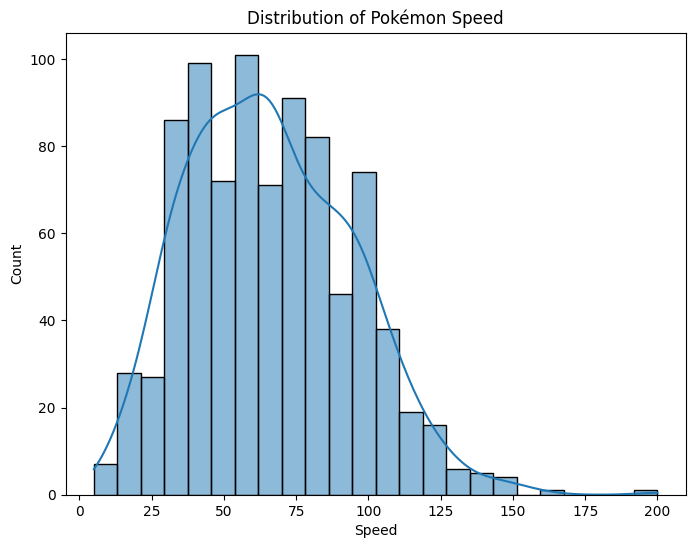

In [17]:
plt.figure(figsize=(8,6))
sns.histplot(df['speed'], kde=True, edgecolor='black')
plt.title("Distribution of Pokémon Speed")
plt.xlabel("Speed")
plt.ylabel("Count")
plt.show()

## Question 12
### Visualize the number of Pokémon who can Gigantamax vs those who can't.

C:\Users\Shreyas S Hegde\AppData\Local\Temp\ipykernel_22688\2250394326.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['can_gigantamax'] = gigantamax_status


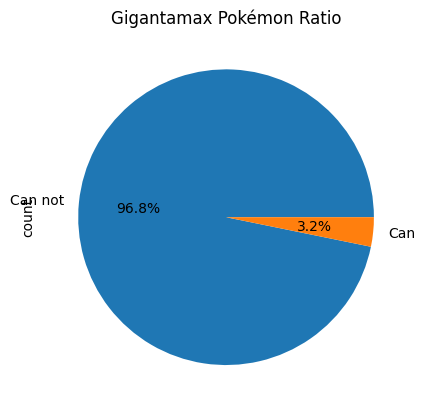

In [19]:
gigantamax_status = []

for i in df.index:
    if df.loc[i, 'gigantamax'] == 0:
        gigantamax_status.append(0)
    else:
        gigantamax_status.append(1)

df['can_gigantamax'] = gigantamax_status

counts = df['can_gigantamax'].value_counts().sort_index()

counts.plot.pie(
    autopct='%1.1f%%',
    labels=["Can not", "Can"],
)

plt.title("Gigantamax Pokémon Ratio")
plt.show()
